© 2025 All Rights Reserved
This work is the intellectual property of Mahadevaprasad DL. Unauthorized reproduction, distribution, or modification of any content without prior written permission is strictly prohibited. For permissions or inquiries, please contact me before using it.

📧 Email: girishdl78524@gmail.com


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
df = pd.read_csv('tennis.csv')

In [18]:
print(df.columns)

Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes
None


In [5]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64


In [30]:
df = pd.get_dummies(df, drop_first=True)
print("Encoded Columns:", df.columns)

Encoded Columns: Index(['play', 'outlook_rainy', 'outlook_sunny', 'temp_hot', 'temp_mild',
       'humidity_normal', 'windy_True'],
      dtype='object')


In [27]:
X = df.drop(columns=['play'])
y = df['play']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



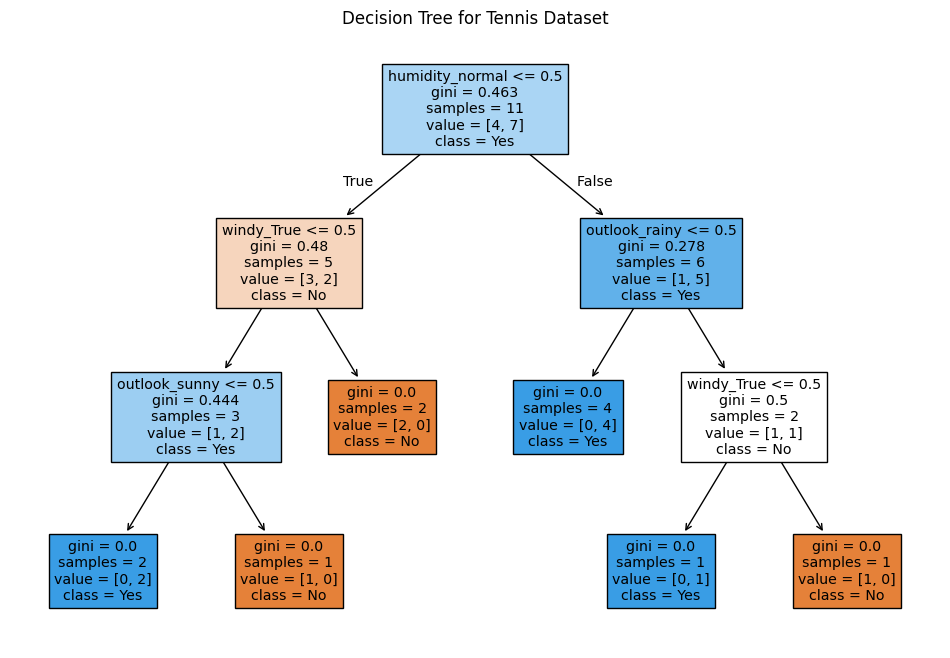

In [34]:
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree for Tennis Dataset")
plt.show()

In [35]:
cm = confusion_matrix(y_test, y_pred)

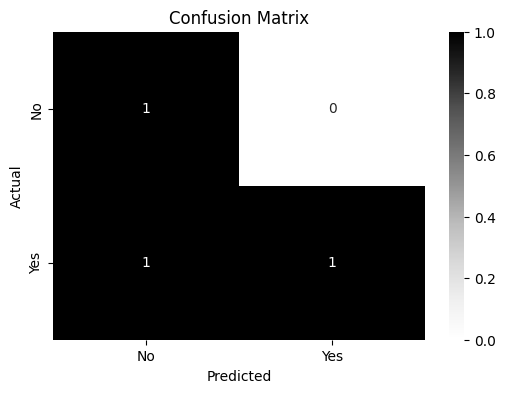

In [40]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greys", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()